In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-10,10, num=100)
Y = [(-2,3),(-4,-6),(3,-1),(0,12),(10.5,10.5),(-1.75,-10)]

In [59]:
def plot_line(Y):
    for y in Y:
        plt.plot(x,y[0]*x+y[1],label = (str(y[0])+'x+'+str(y[1])))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
def plot_dashed(x, pt):
    for i in range(len(pt)) : 
        k = pt[i][0][0]*x+pt[i][0][1]
        plt.plot(x[pt[i][1][0]:pt[i][1][1]],k[pt[i][1][0]:pt[i][1][1]],linewidth=3, dashes=(4, 8), color='red')
        plt.plot(x[pt[i][1][0]],k[pt[i][1][0]],'ro', markersize=10)
    plt.plot(x[pt[len(pt)-1][1][1]],k[pt[len(pt)-1][1][1]],'ro',markersize=10)

In [60]:
def divide(x, Y):
    if len(Y) == 1:
        return Y[0]
    elif len(Y) == 2:
        return conquer(x, Y[0],Y[1])
    else : 
        y1 = Y[:len(Y)//2]
        y2 = Y[len(Y)//2:]
        return conquer(x,divide(x,y1), divide(x,y2))

def create(x, f):
    f1 = np.array([])
    for item in f :
        k = (item[0][0]*x[item[1][0]:item[1][1]+1] + item[0][1])
        f1 = np.hstack((f1,k))
    return f1

def my_interval(f, start, end):
    I = []
    if len(f) != 0 and type(f[0])==list :
        for item in f :
            if (item[1][0] <= start and end <= item[1][1]):
                I.append([item[0],(start,end)])
                return I
            elif (start <= item[1][0] and end <= item[1][1] and end >= item[1][0]):
                I.append([item[0],(item[1][0],end)])
                end = item[1][0] - 1
            elif (item[1][0] <= start and item[1][1] <= end and start <= item[1][1]):
                I.append([item[0],(start,item[1][1])])
                start = item[1][1] + 1
            elif (start <= item[1][0] and item[1][1] <= end): 
                I.append([item[0],(item[1][0],item[1][1])])
                I.extend(my_interval(f, start, item[1][0]))
                I.extend(my_interval(f, item[1][1], end))
                return I
    else : 
        I.append([f,(start,end)])
        return I
            
def conquer(x, f, g):
    upperE = []
    if len(f) != 0 and type(f[0])!=list :
        f1 = f[0]*x + f[1]
    else : f1 = create(x, f)
    if len(g) != 0 and type(g[0])!=list :
        g1 = g[0]*x + g[1]
    else : g1 = create(x, g)
    h = np.sign(f1-g1)
    idx = np.argwhere(np.diff(h)).flatten() 
    if len(idx)==0:
        if -1 in h : 
            if len(g) != 0 and type(g[0])!=list :
                upperE.append([g,(0,len(x))])
            else:  upperE.extend(g)
        else :  
            if len(f) != 0 and type(f[0])!=list :
                upperE.append([f,(0,len(x))])
            else:  upperE.extend(f)
    else:
        for i in range(len(idx)+1): 
            if i==0 :
                start, end = i, idx[i]
            elif i == len(idx):
                start, end = idx[i-1]+1, len(h)-1
            else :
                start, end = idx[i-1]+1, idx[i]
            if -1 in h[start:end] : # g is bigger than f
                upperE.extend(my_interval(g, start, end))
            else : 
                upperE.extend(my_interval(f, start, end))
    return upperE

def main(x,Y):
    plot_line(Y)
    z = divide(x,Y)
    plot_dashed(x, z)
    plt.show()

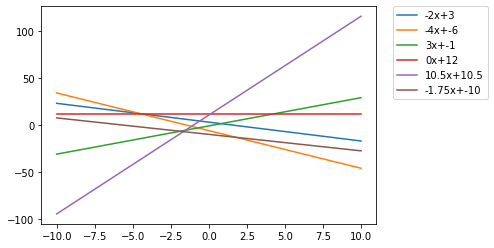

In [5]:
plot_line(Y)
plt.show()

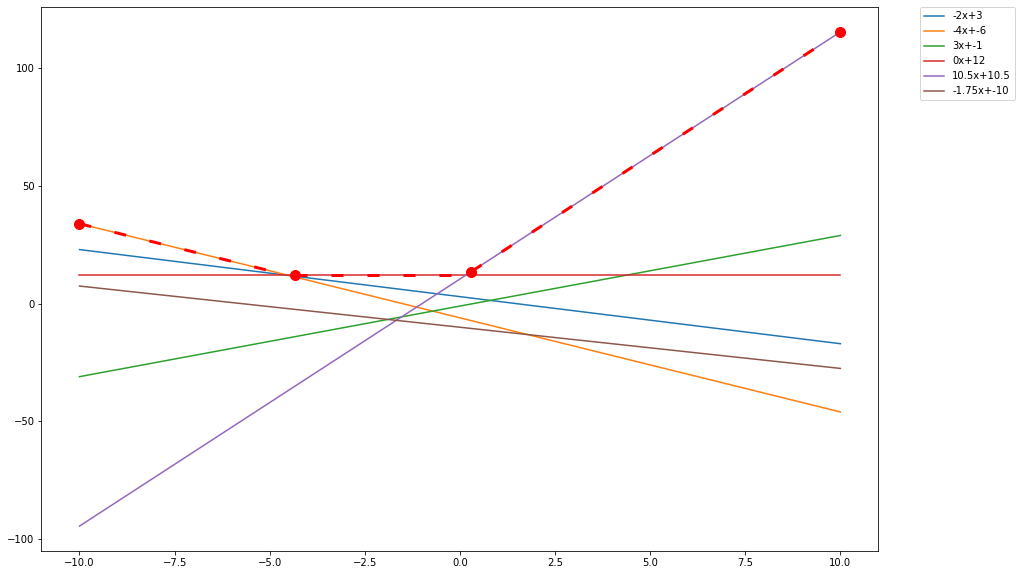

In [61]:
figsize=(15, 10)
plt.figure(figsize=figsize)
main(x,Y)

### PROGRAMMATION DYNAMIQUE

In [41]:
def envelop(x,Y):
    memo = []
    for i in range(len(Y)):
        if len(memo) == 0:
            memo.append([[Y[i],(0,len(x))]])
        else:
            memo.append([])
            memo[i] = conquer(x,Y[i],memo[i-1])
    return memo

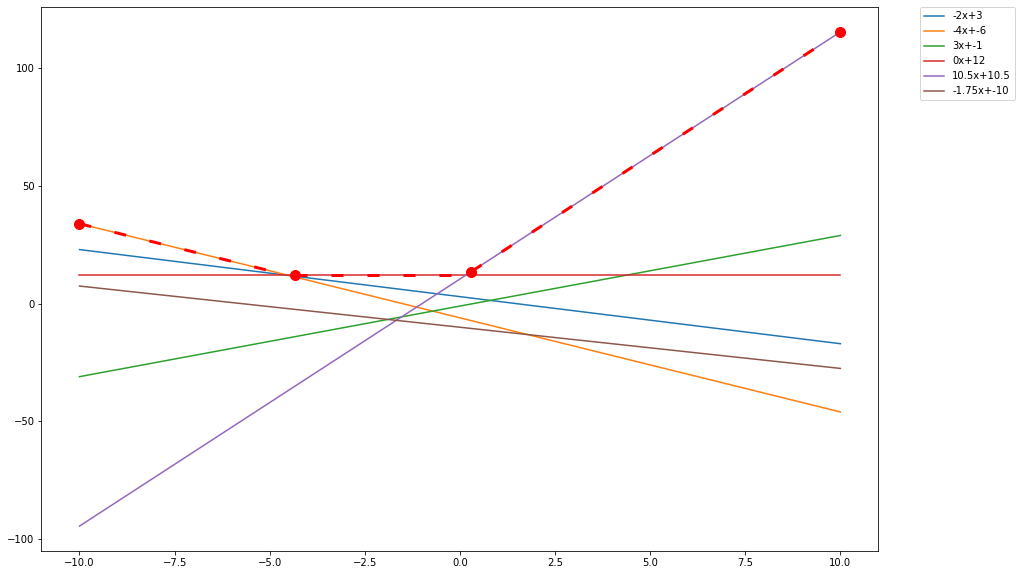

In [62]:
uE = envelop(x,Y)
figsize=(15, 10)
plt.figure(figsize=figsize)
plot_line(Y)
plot_dashed(x,uE[len(uE)-1])
plt.show()